In [245]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [246]:
df=pd.read_csv('heart.csv')

In [247]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [248]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [249]:
#looks like data is balanced

In [250]:
# checking null values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [251]:
# checking duplicated rows

In [252]:
df[df.duplicated()].shape

(0, 12)

In [253]:
# statistical distribution
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [254]:
df.shape

(918, 12)

In [255]:
# Removing outliers

In [256]:
Q1=df['Cholesterol'].quantile(0.25)
Q3=df['Cholesterol'].quantile(0.75)
IQR=Q3-Q1

In [257]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(32.625, 407.625)

In [258]:
df=df[(df['Cholesterol']>lower_limit) & (df['Cholesterol']<upper_limit)]

In [259]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [260]:
df.shape

(735, 12)

<Axes: xlabel='Cholesterol', ylabel='Age'>

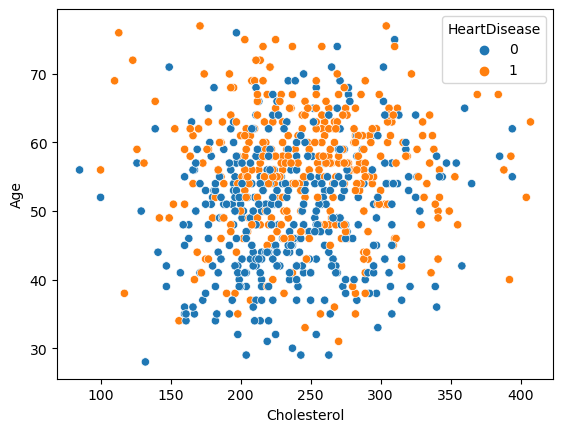

In [261]:
# Data Visualization
sns.scatterplot(x=df['Cholesterol'], y=df['Age'], hue=df['HeartDisease'])

<Axes: xlabel='Sex', ylabel='count'>

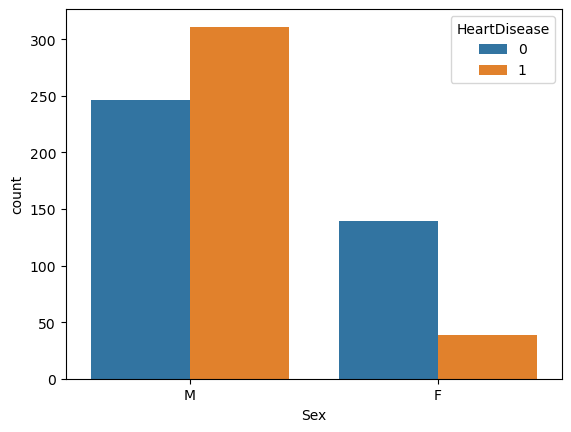

In [262]:
sns.countplot(data=df,x='Sex',hue='HeartDisease')

In [263]:
#Observation:
# Males are high in number than female
#In males above 300 has heart disease and in female it is quite low which is < 50

<Axes: xlabel='ChestPainType', ylabel='count'>

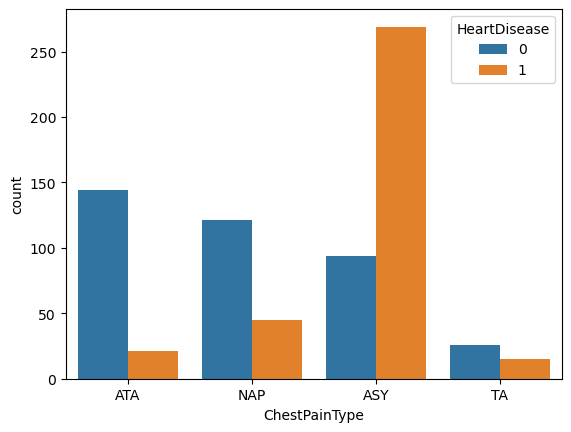

In [264]:
sns.countplot(data=df,x='ChestPainType',hue='HeartDisease')

<Axes: xlabel='Cholesterol', ylabel='RestingECG'>

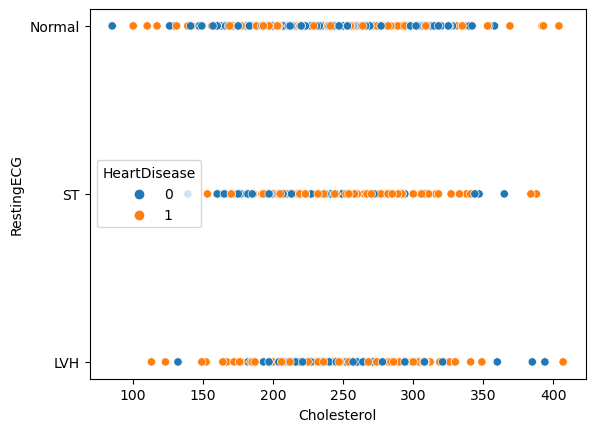

In [265]:
sns.scatterplot(x=df['Cholesterol'], y=df['RestingECG'], hue=df['HeartDisease'])

<Axes: xlabel='Cholesterol', ylabel='RestingBP'>

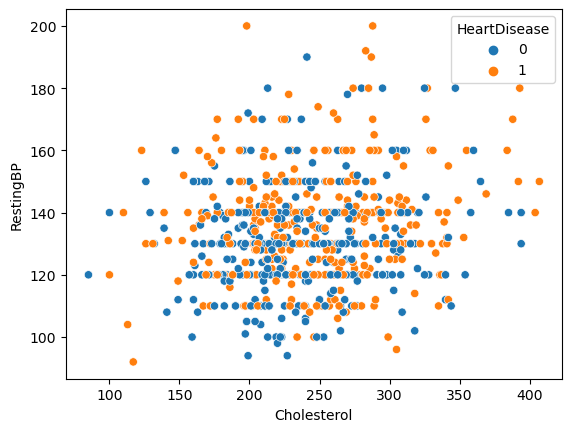

In [266]:
sns.scatterplot(x=df['Cholesterol'], y=df['RestingBP'], hue=df['HeartDisease'])

In [267]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [268]:
# since chain pain type sex , resting ecg excercise angina , st_slope are 
df_dummies=pd.get_dummies(df)

In [269]:
df_dummies.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [270]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
X=df_dummies.drop(['HeartDisease'],axis=1)
y=df_dummies.HeartDisease
scale=MinMaxScaler()
scaled_x=scale.fit_transform(X)

In [271]:
# using Grid Search CV for finding best algo

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [273]:
model_params={
    'logistic_reg':{
        'model':LogisticRegression(),
        'params':{
            'C':[1,5,10]
        }
    },
    
    'Decision_Tree':{
        'model':DecisionTreeClassifier(),
        'params':{
           'criterion': ['gini','entropy'],
        }
    },
    
     'Random_Forest':{
        'model':RandomForestClassifier(),
        'params':{
           'n_estimators':[1,5,10] ,
        }
    },
    
    
     'SVM':{
        'model':SVC(gamma='auto'),
        'params':{
           'C':[1,5,10],
            'kernel': ['rbf','linear']
        }
    },
    
       'Gaussian_NaiveBayes':{
        'model':GaussianNB(),
        'params':{
           
        }
    },
    
    
    
    
}

In [274]:
from sklearn.model_selection import GridSearchCV

In [275]:
scores=[]
for model_name,mp in model_params.items():
    clf=GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(scaled_x,y)
    scores.append({
        'model':model_name,
        'bestscore':clf.best_score_,
        'best_params':clf.best_params_
        
    })

In [276]:
scores

[{'model': 'logistic_reg',
  'bestscore': 0.8571428571428571,
  'best_params': {'C': 1}},
 {'model': 'Decision_Tree',
  'bestscore': 0.7931972789115646,
  'best_params': {'criterion': 'entropy'}},
 {'model': 'Random_Forest',
  'bestscore': 0.8312925170068027,
  'best_params': {'n_estimators': 5}},
 {'model': 'SVM',
  'bestscore': 0.8530612244897959,
  'best_params': {'C': 5, 'kernel': 'linear'}},
 {'model': 'Gaussian_NaiveBayes',
  'bestscore': 0.8530612244897959,
  'best_params': {}}]

In [277]:
model_res=pd.DataFrame(scores)
model_res

,model,bestscore,best_params
0,logistic_reg,0.857143,{'C': 1}
1,Decision_Tree,0.793197,{'criterion': 'entropy'}
2,Random_Forest,0.831293,{'n_estimators': 5}
3,SVM,0.853061,"{'C': 5, 'kernel': 'linear'}"
4,Gaussian_NaiveBayes,0.853061,{}


In [278]:
#logistic regression is giving 85.7 accuracy

In [279]:
#lets use PCA

In [280]:
from sklearn.decomposition import PCA

In [281]:
pca=PCA(0.9999)
pca_scaled=pca.fit_transform(X)
pca_scaled.shape

(735, 12)

In [282]:
pca.n_components_

12

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(pca_scaled,y,test_size=0.2,random_state=45)

In [285]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train_pca)
model.score(X_test_pca,y_test_pca)*100

88.43537414965986

In [286]:
pca.explained_variance_ratio_

array([7.26329549e-01, 1.73503172e-01, 7.99414761e-02, 1.92633711e-02,
       3.51867409e-04, 1.14789631e-04, 9.59324162e-05, 9.18479904e-05,
       7.43746534e-05, 6.05017536e-05, 5.68311902e-05, 4.78072266e-05])

In [324]:
pca_n=PCA(n_components=6)
pca_x=pca_n.fit_transform(X)

X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(pca_x,y,test_size=0.2,random_state=45)

In [325]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train_pca,y_train_pca)
model.score(X_test_pca,y_test_pca)*100

85.71428571428571

In [326]:
# as no of components increasing accuracy increasing after 5 components